# **Oxygen in the Strait of Georgia**

In [1]:
import cmocean.cm as cm
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
# import statfieldodels.api as sm
import xarray as xr

from salishsea_tools import viz_tools
import netCDF4 as nc

# import glob

# North

In [2]:
def read_pieces(pieces):
    temp1 = pd.read_csv(pieces[0])
    for piece in pieces[1:]:
        nextpiece = pd.read_csv(piece)
        if 'ferry' in piece:
            nextpiece['k'] = 0
        temp1 = pd.concat([temp1, nextpiece], ignore_index=True)
    return temp1

In [9]:
y = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
# y = [2018, 2019]
years = np.array(y)
pieces = []
df = pd.DataFrame()
for year in years:
        pieces.append(
              f'/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_{year}0101_{year}1231.csv')
data_bot = read_pieces(pieces)
        #df = pd.concat([data_bot, df_csv_append], ignore_index=True)
data_bot

,Unnamed: 0,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Chlorophyll_Extracted,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_flagellates,mod_vosaline,mod_votemper,mod_dissolved_oxygen,k
0,0,2007.0,2.0,23.0,5.530278,49.319167,-123.8010,6.0,NaN,7.79,...,246,25.040506,50.541100,1.127255,0.482299,0.196455,28.584118,7.920136,274.199707,5
1,1,2007.0,2.0,23.0,5.530278,49.319167,-123.8010,21.3,NaN,3.06,...,246,26.823246,53.314888,0.967661,0.255242,0.159323,29.460060,8.236219,240.519928,19
2,2,2007.0,2.0,23.0,5.530278,49.319167,-123.8010,51.5,NaN,0.11,...,246,27.905815,52.202267,0.798150,0.079532,0.059894,30.236198,8.781296,216.537003,24
3,3,2007.0,2.0,23.0,5.530278,49.319167,-123.8010,101.5,NaN,0.10,...,246,26.866858,48.162453,0.856218,0.111528,0.073811,30.385254,8.206964,228.185669,26
4,4,2007.0,2.0,23.0,5.530278,49.319167,-123.8010,151.1,NaN,NaN,...,246,27.156851,48.782696,0.748487,0.098728,0.055468,30.776199,8.576658,202.310898,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19415,1592,2019.0,10.0,6.0,2.446389,49.295333,-123.0545,5.1,5.0,3.07,...,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19416,1593,2019.0,10.0,6.0,2.446389,49.295333,-123.0545,10.1,10.0,2.39,...,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19417,1594,2019.0,10.0,6.0,2.446389,49.295333,-123.0545,20.0,19.8,1.07,...,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19418,1595,2019.0,10.0,6.0,2.446389,49.295333,-123.0545,30.1,29.9,NaN,...,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


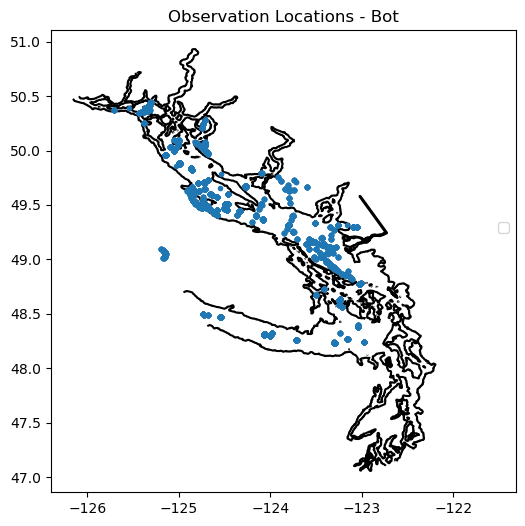

In [8]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1)
    

ax, plt.plot(data_bot.Lon, data_bot.Lat,'.')

#ax.set_ylim(48.5, 48.78)
ax.legend(bbox_to_anchor=[1,.6,0,0])
#ax.set_xlim(-123.65, -123.44);
ax.set_title('Observation Locations - Bot');


In [ ]:
# Concat all bot data
# np.savetxt('/ocean/atall/MOAD/ObsModel/202111/bot/ObsModel_202111_bot_all_200201_20191231.csv',  data_bot, fmt='%s')

In [ ]:
# date_range=(dt.datetime(2015,1,1),dt.datetime(2017,12,31))

(14061,)

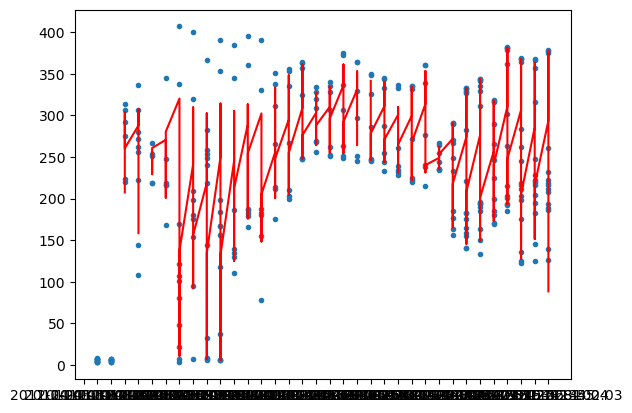

In [ ]:
# SMOOTH data
DO = data_bot.Oxygen_Dissolved
dtime = data_bot.dtUTC
# dtime = data_bot.D
def smooth(DO, box_pts):
    box = np.ones(box_pts)/box_pts
    DO_smooth = np.convolve(DO, box, mode='same')
    return DO_smooth

plt.plot(dtime[:365], DO[:365], '.')
plt.plot(dtime[:365], smooth(DO[:365],3), 'r-')

#plot(x, smooth(y,3), 'r-', lw=2)
#plot(x, smooth(y,19), 'g-', lw=2)
DO.shape